![image]('https://blog.jacto.com.br/wp-content/uploads/2021/01/post_thumbnail-3c4fe3c107f39c15181fb712f449ca43-925x308.jpg')

##  Fertilizantes Entregues ao Mercado (em toneladas de produto)

Fonte: [Fertilizantes]('https://anda.org.br/wp-content/uploads/2022/09/Principais_Indicadores_2022.pdf')

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

from pylab import mpl, plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore');

In [2]:
# dataset = pd.read_excel('Fertilizantes.xlsx', index_col='data')
dataset = pd.read_excel('Fertilizantes.xlsx')
dataset['year'] = dataset['data'].dt.year
dataset['month'] = dataset['data'].dt.month 
dataset = dataset.set_index('data')

# Ajustando os valores de mês
# dataset['month'] = dataset['month'].map({1 : 'Jan', 2 : 'Fev', 3 : 'Mar',
#                                         4 : 'Abr', 5 : 'Mai', 6 : 'Jun',
#                                         7 : 'Jul', 8 : 'Ago', 9 : 'Set',
#                                         10 : 'Out', 11: 'Nov', 12 : 'Dez'})

dataset.head(20)
dataset.tail(20)

,fertilizantes,year,month
data,,,
2020-11-01,3595,2020,11
2020-12-01,3312,2020,12
2021-01-01,3398,2021,1
2021-02-01,3042,2021,2
2021-03-01,2572,2021,3
2021-04-01,1945,2021,4
2021-05-01,3418,2021,5
2021-06-01,4384,2021,6
2021-07-01,5059,2021,7


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 1998-01-01 to 2022-06-01
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   fertilizantes  294 non-null    int64
 1   year           294 non-null    int64
 2   month          294 non-null    int64
dtypes: int64(3)
memory usage: 9.2 KB


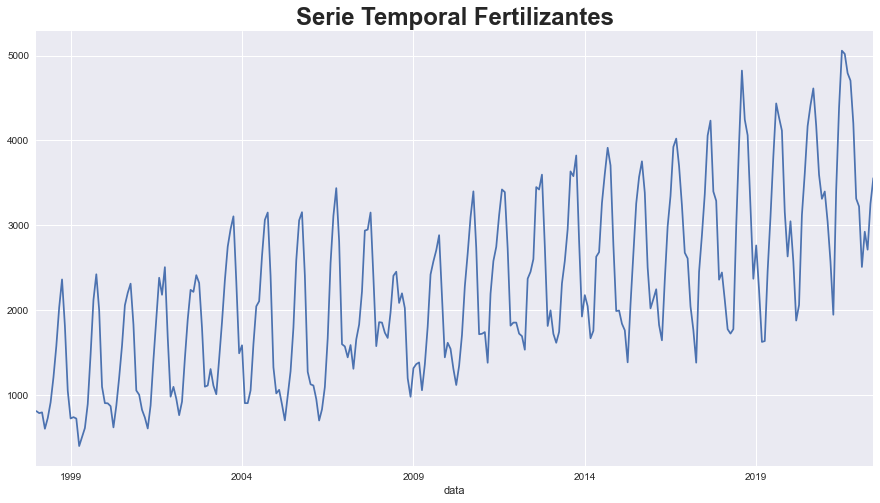

In [4]:
dataset['fertilizantes'].plot(figsize = (15,8)).set_title("Serie Temporal Fertilizantes", 
                                               size=24, fontname="Arial", fontweight="bold");

In [5]:
# dataset['month'] = dataset['data'].dt.month
dataset.columns

Index(['fertilizantes', 'year', 'month'], dtype='object')

Text(0.5, 1.0, 'Tendência anual da demanda de Fertilizantes')

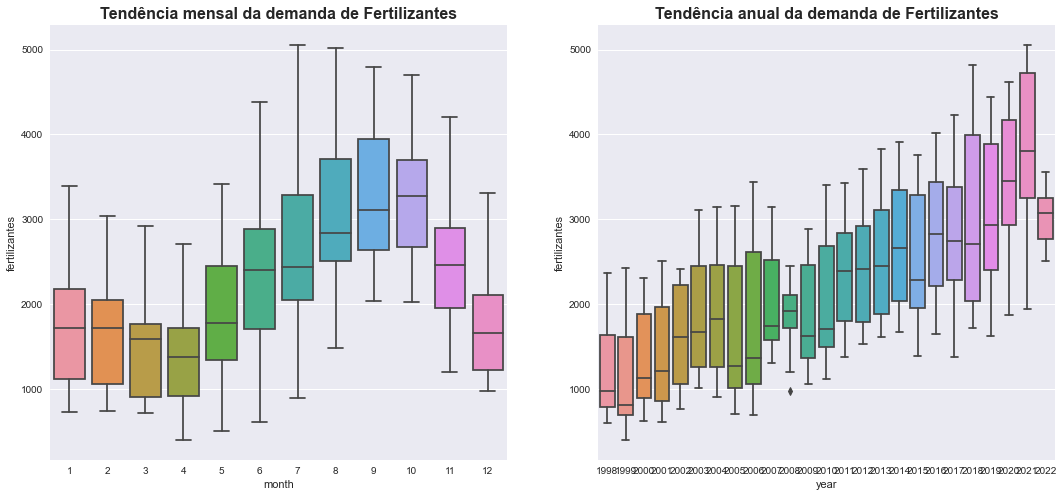

In [6]:
import seaborn as sns

# Analisar o comportamento da Série
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18, 8))

sns.boxplot(dataset['month'], 
            dataset['fertilizantes'], 
            ax=ax[0]).set_title('Tendência mensal da demanda de Fertilizantes',
                                size = 16, fontweight='bold')

sns.boxplot(x=dataset['year'],
           y=dataset['fertilizantes'], 
            ax=ax[1]).set_title('Tendência anual da demanda de Fertilizantes',
                                size=16, fontweight='bold')

Text(153.0, 0.5, 'Year')

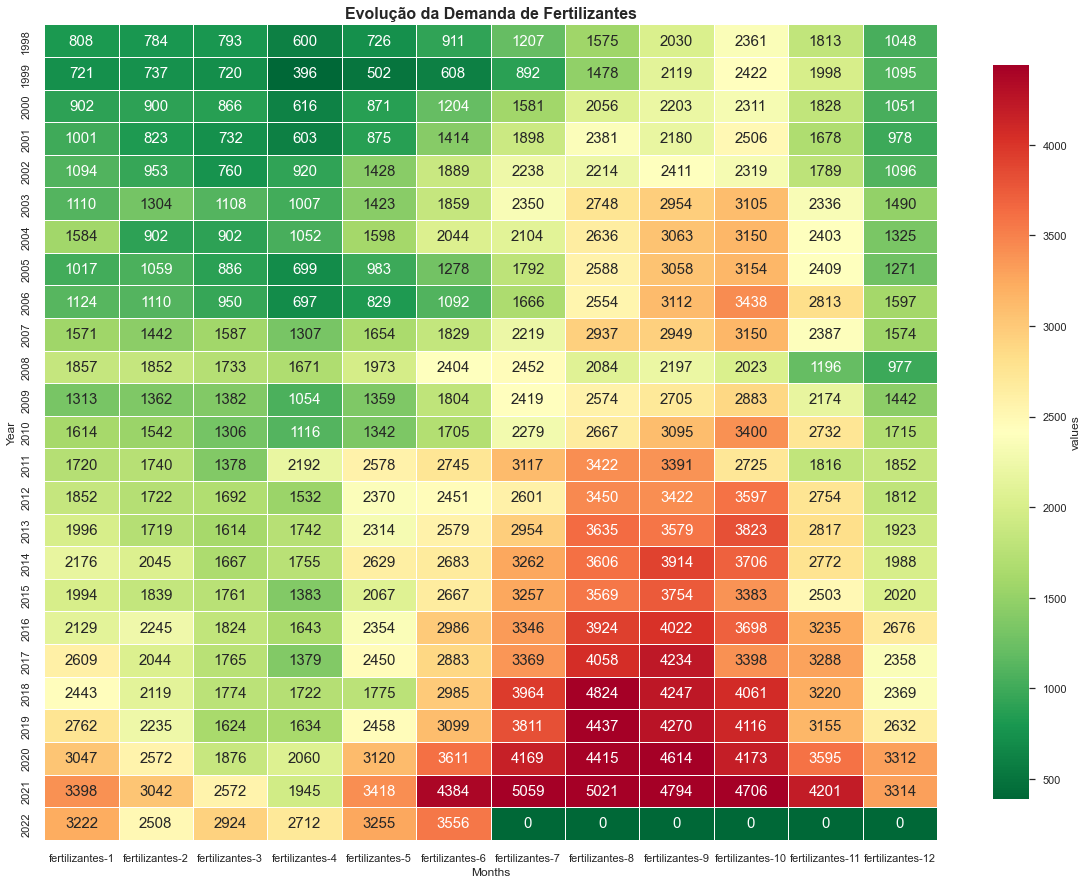

In [7]:
table_seasonal = pd.pivot_table(dataset,
                               values  = ['fertilizantes'],
                               index   = ['year'],
                               columns = ['month'],
                               fill_value=0)

# Ajustando o tamanho do gráfico
sns.set(rc = {'figure.figsize':(20,15)})
ax = sns.heatmap(table_seasonal, cmap = 'RdYlGn_r',
                 robust = True, fmt = '.0f',
                 annot  = True, linewidths = .8,
                 annot_kws = {'size':15},
                 cbar_kws  = {'shrink':.9,
                           'label':'values'}).set_title('Evolução da Demanda de Fertilizantes',
                                                               size = 16, fontweight='bold')

plt.xlabel('Months')
plt.ylabel('Year')

### Verificando se a série e Multiplicativa ou Aditiva

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Série Multiplicativa
multi_dataset = seasonal_decompose( dataset['fertilizantes'], 
                                   model='multiplicative', 
                                   extrapolate_trend='freq' )
# Série Aditiva
addit_dataset = seasonal_decompose( dataset['fertilizantes'], 
                                   model='additive', 
                                   extrapolate_trend='freq' )


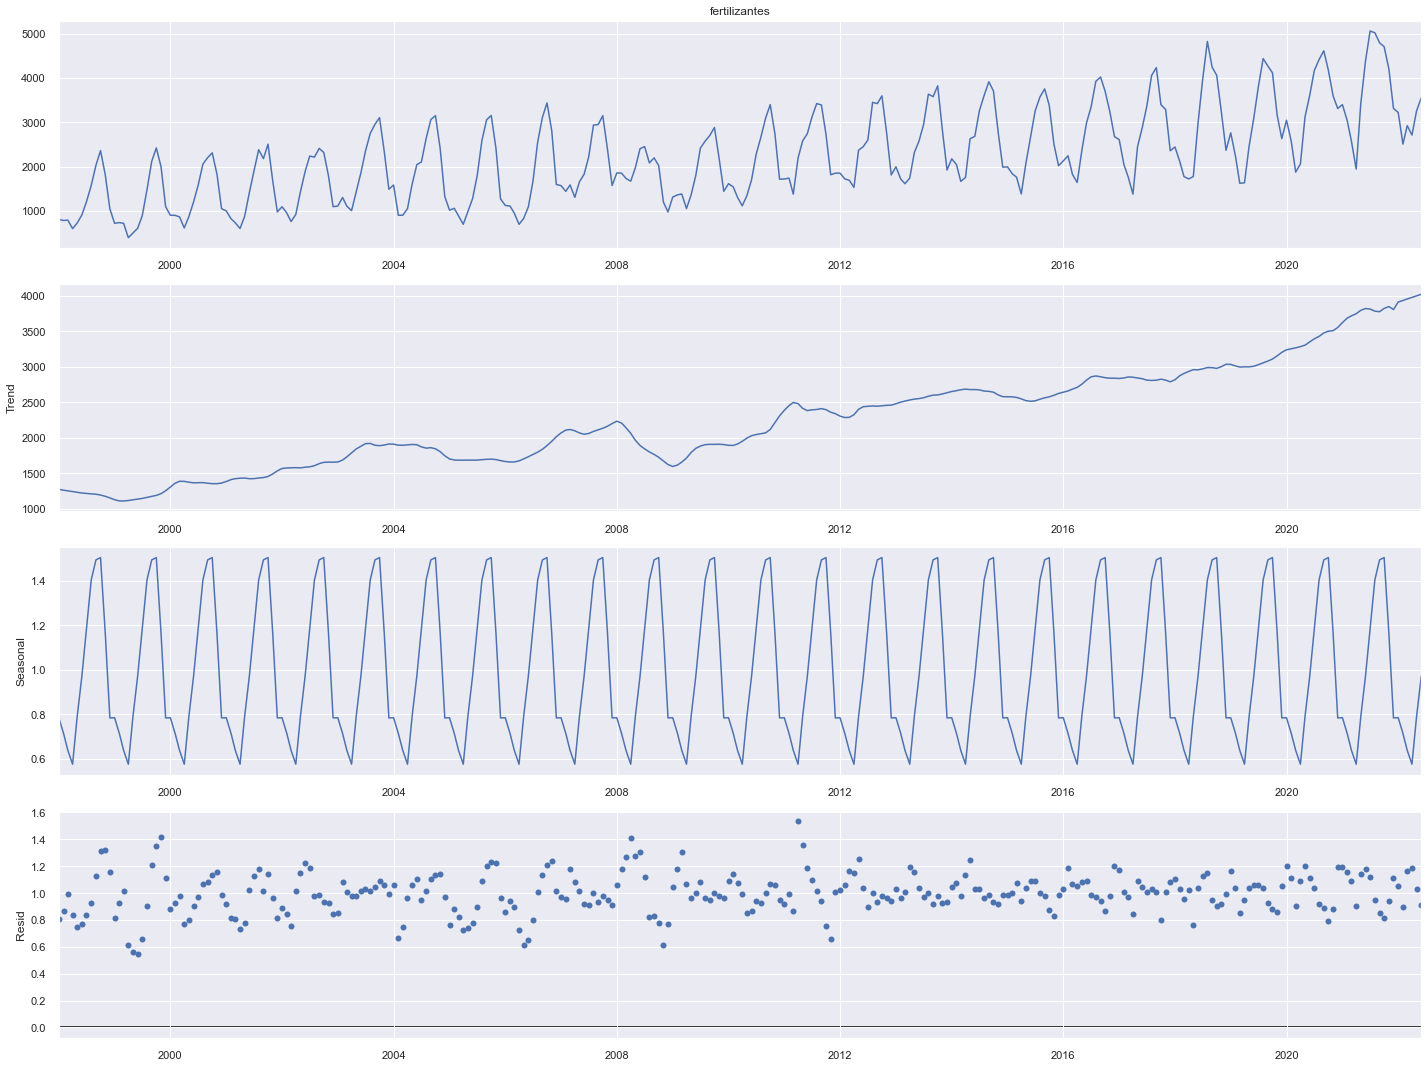

In [9]:
plot_multi = multi_dataset.plot()

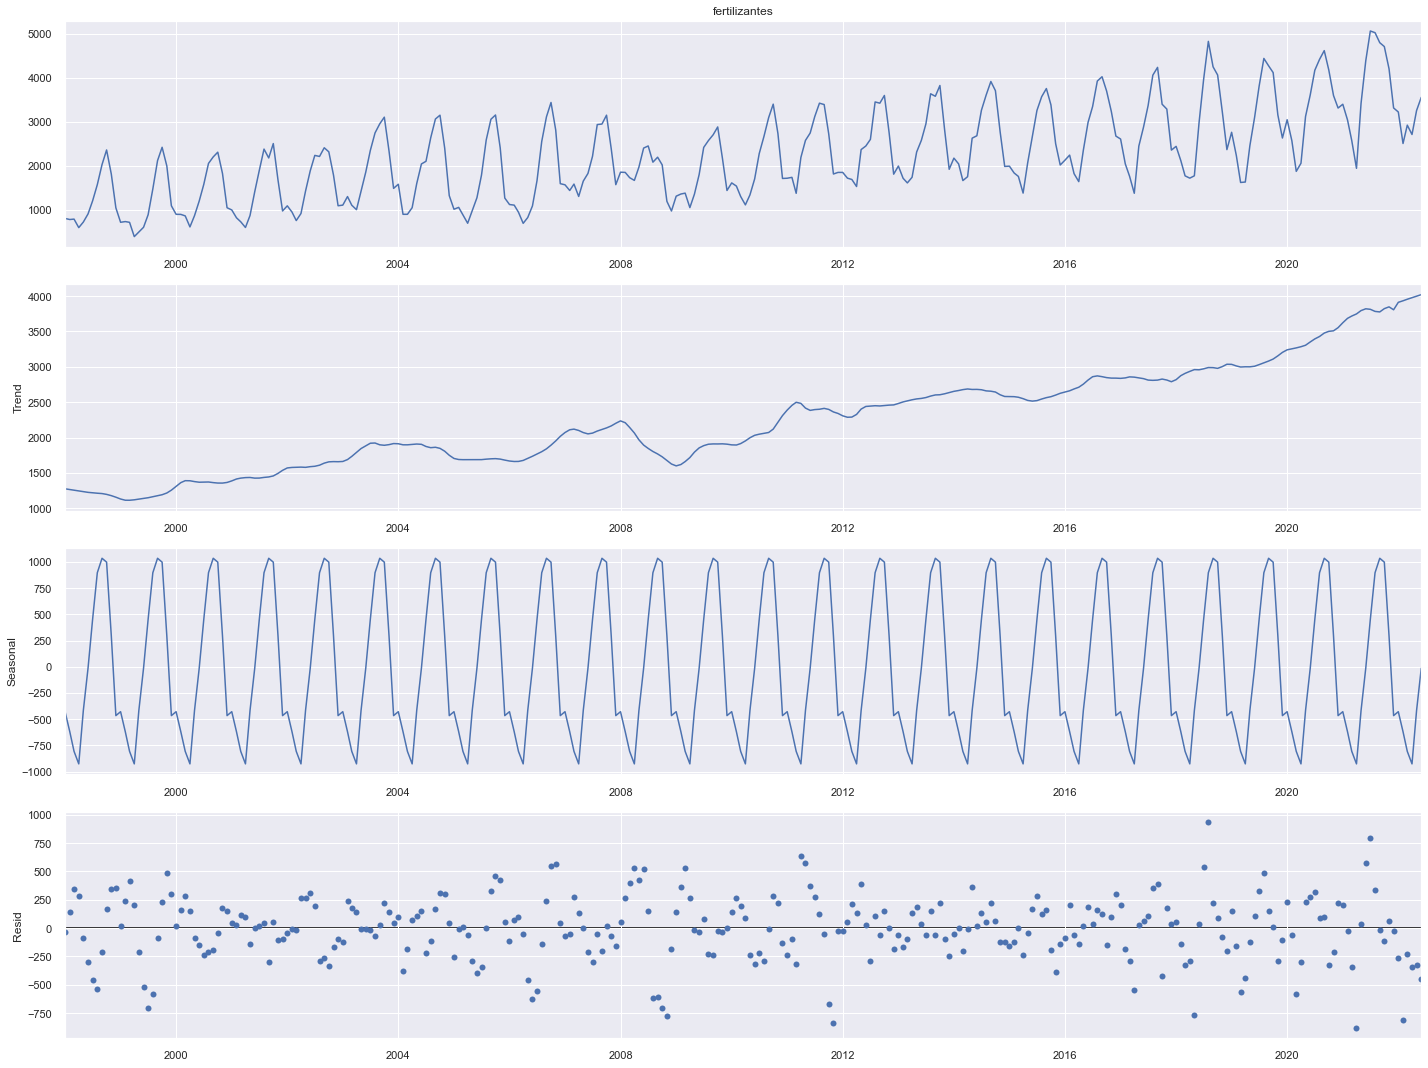

In [10]:
plot_addit = addit_dataset.plot()

### Autocorrelação e Correlação Parcial

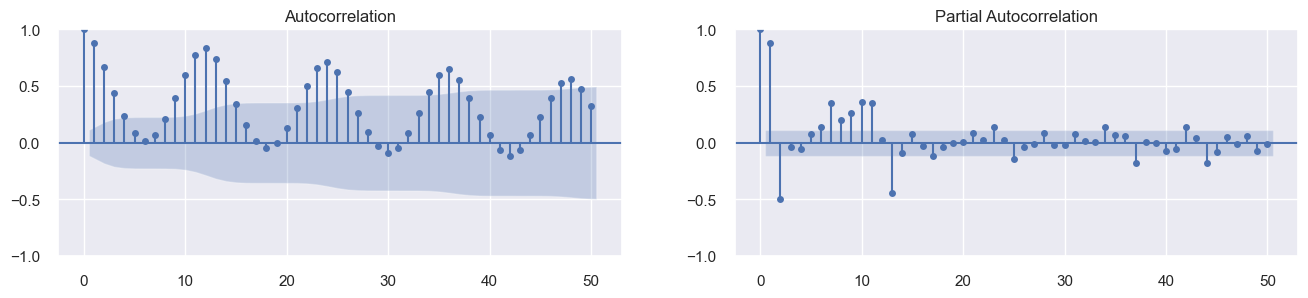

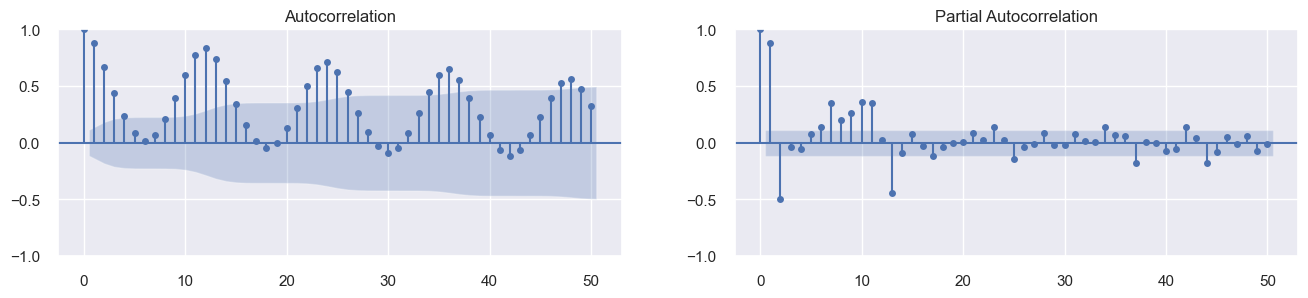

In [11]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dataset['fertilizantes'].tolist(), lags=50, ax=axes[0])
plot_pacf(dataset['fertilizantes'].tolist(), lags=50, ax=axes[1])

### Testando a estacionariedade

In [12]:
from statsmodels.tsa.stattools import adfuller, kpss

# adf teste
# ADF Test
result = adfuller(dataset.fertilizantes.values, autolag='AIC')
print(f'ADF Statistic: {result[0]:.4f}')
print(f'p-value: {result[1]:.4}')

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value:.4f}')

ADF Statistic: -0.2465
p-value: 0.9327
Critial Values:
   1%, -3.4538
Critial Values:
   5%, -2.8719
Critial Values:
   10%, -2.5723


In [13]:
# KPSS teste
result = kpss(dataset.fertilizantes.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 2.670965
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [14]:
dataset.columns
display(dataset.head())

,fertilizantes,year,month
data,,,
1998-01-01,808,1998,1
1998-02-01,784,1998,2
1998-03-01,793,1998,3
1998-04-01,600,1998,4
1998-05-01,726,1998,5


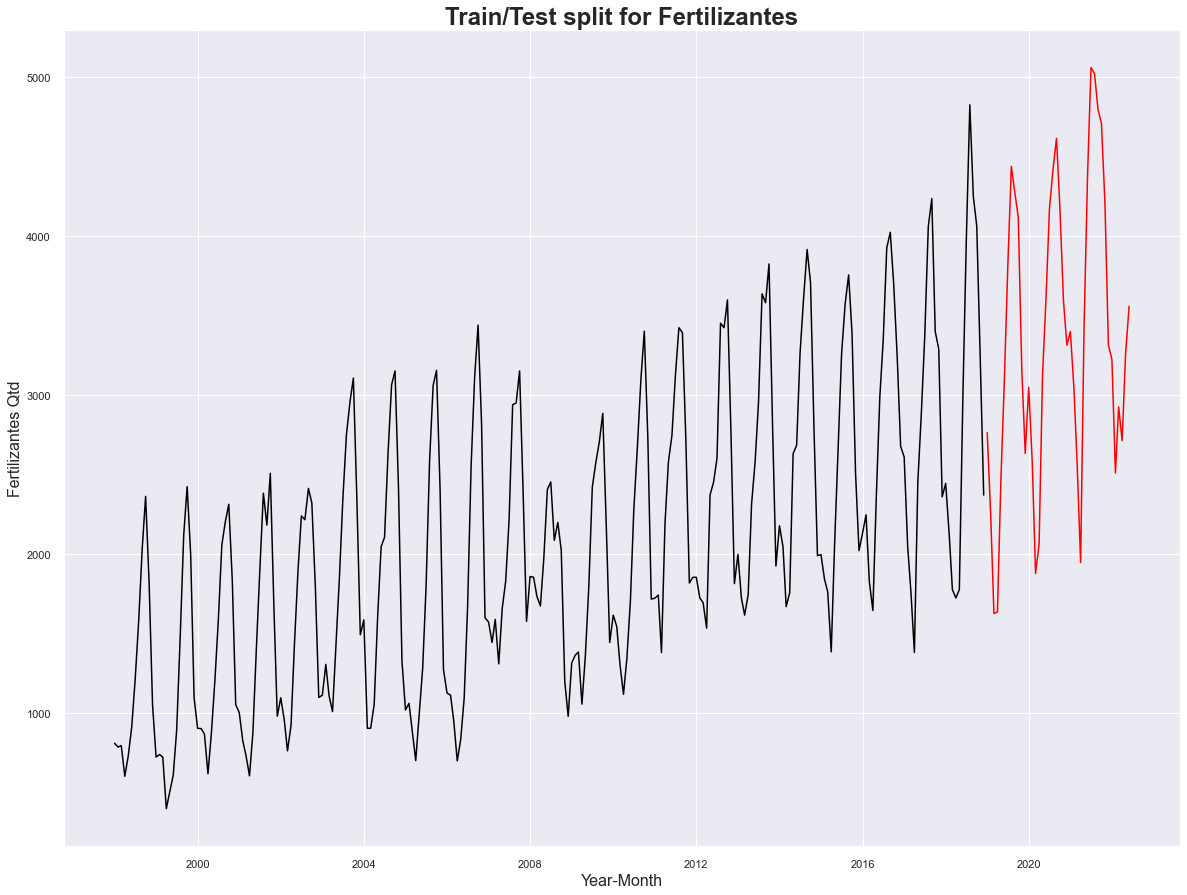

In [15]:
dataset.drop(columns=['year', 'month'], axis=1, inplace=True)
dataset['data'] = dataset.index
train = dataset[ dataset['data'] < pd.to_datetime("2019-01-01")]
del train['data']
# train['train'] = train['#Fertilizantes']
test = dataset[ dataset['data'] >= pd.to_datetime("2019-01-01")]
del test['data']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Fertilizantes", size=24, fontweight='bold')
plt.ylabel("Fertilizantes Qtd", size=16)
plt.xlabel('Year-Month', size=16)
sns.set()
plt.show()

In [16]:
from pmdarima.arima import auto_arima

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, index = test.index, columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3622.649, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3803.987, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3753.356, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3753.993, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3802.033, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3754.081, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3630.225, Time=1.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3752.473, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3628.329, Time=0.67 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3622.304, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3752.087, T

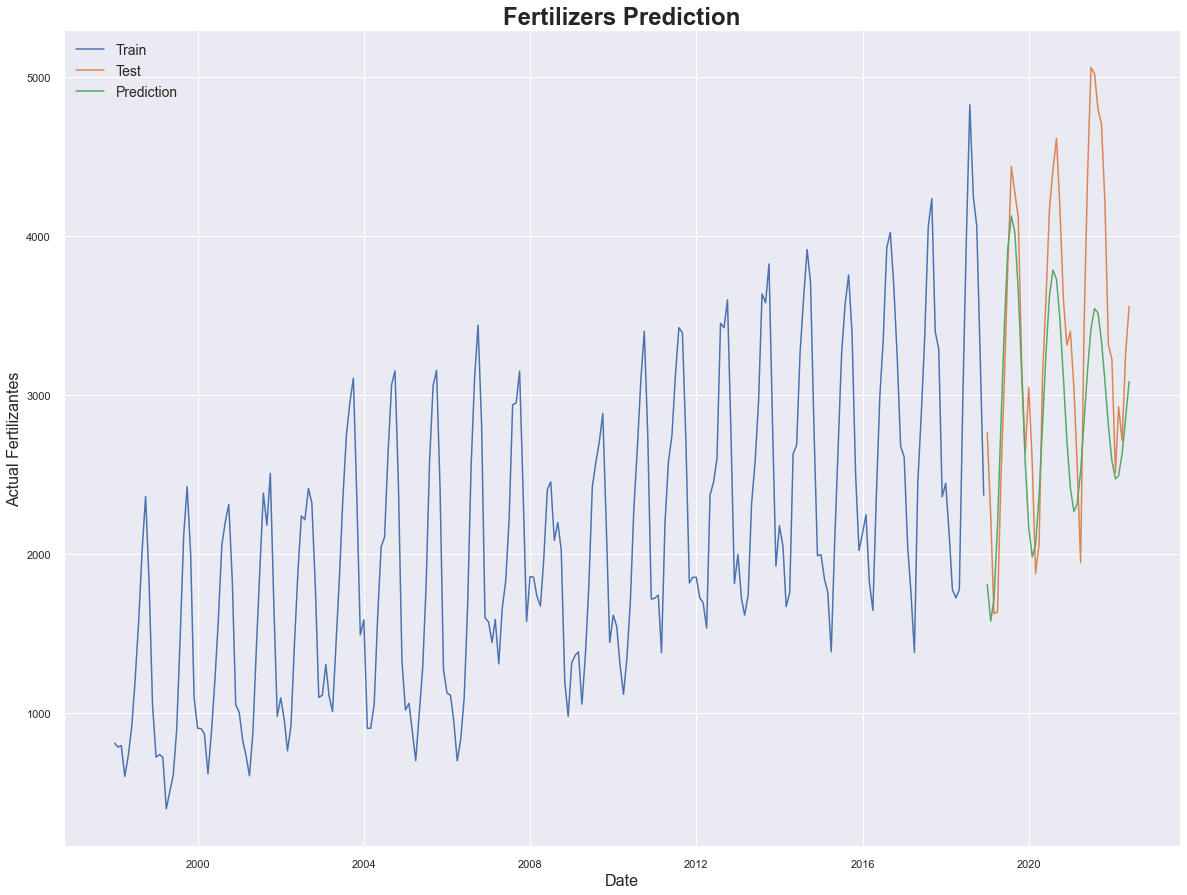

In [17]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('Fertilizers Prediction', size=24, fontweight='bold')
plt.xlabel('Date', size=16)
plt.ylabel('Actual Fertilizantes', size=16)
plt.legend(loc='upper left', fontsize=14)
plt.show()


In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  707.5045753922332


In [26]:
import pmdarima as pm
# Fit an ARIMA
arima = pm.ARIMA(order=(2, 1, 2), seasonal_order=(0, 1, 1, 12))
arima.fit(train)
arima_predict = arima.predict(n_periods=len(test))

# Calculando o Erro do modelo
rms = sqrt(mean_squared_error(test,arima_predict))
print("RMSE: ", rms)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE:  449.9423587595646


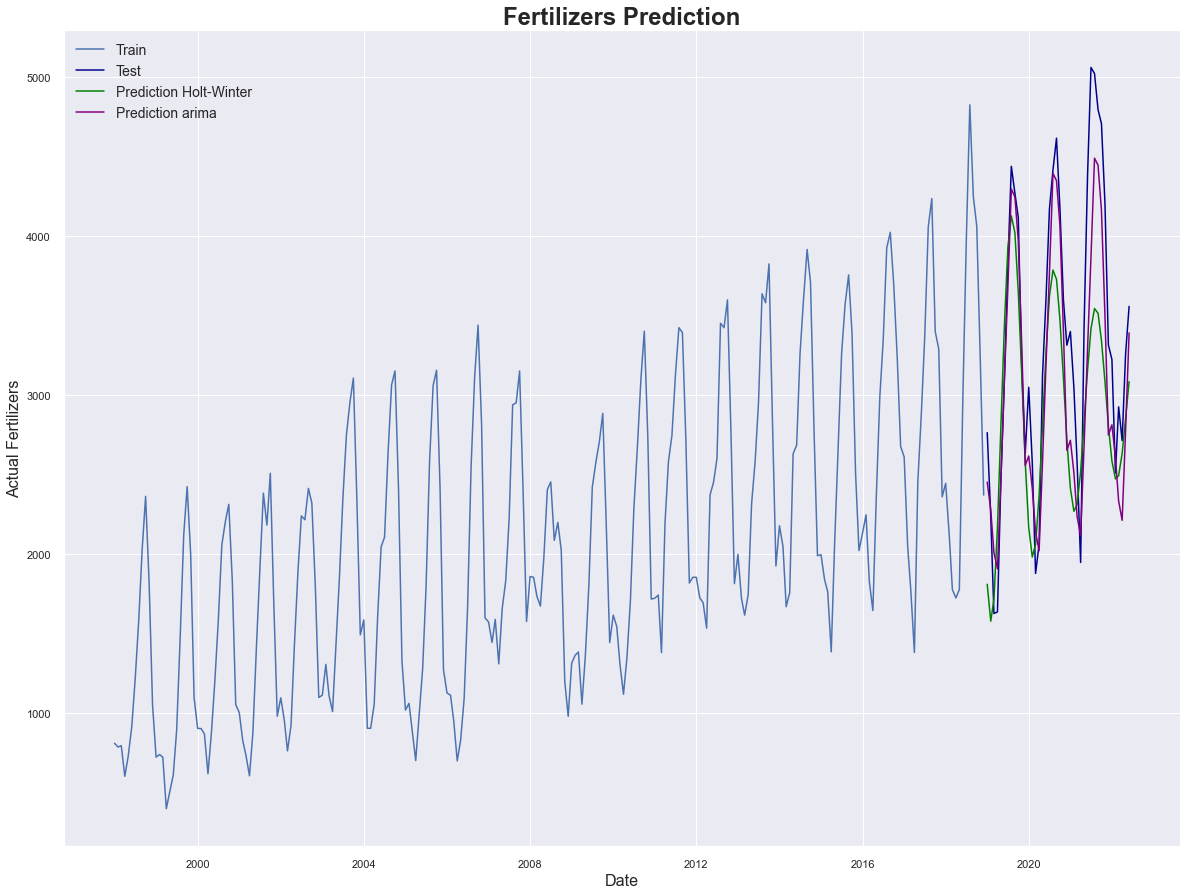

In [29]:
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='darkblue')
plt.plot(forecast, label='Prediction Holt-Winter', color='green')
plt.plot(arima_predict, label='Prediction arima', color='purple')
plt.title('Fertilizers Prediction', size=24, fontweight='bold')
plt.xlabel('Date', size=16)
plt.ylabel('Actual Fertilizers', size=16)
plt.legend(loc='upper left', fontsize=14)
plt.show()